# 5. Databases
Until now, we have been working with datasets stored in Excel files. But Excel has a limit of 1,048,576 rows. Large datasets are often stored in relational databases, e.g., Oracle, MySQL, SQLite.  
  
To see how a database can be queried from Python, we will use the ‘chinook’ sample database (illustrated below). This is an SQLite database for a fictional music download service. It is available from http://www.sqlitetutorial.net/sqlite-sample-database/  

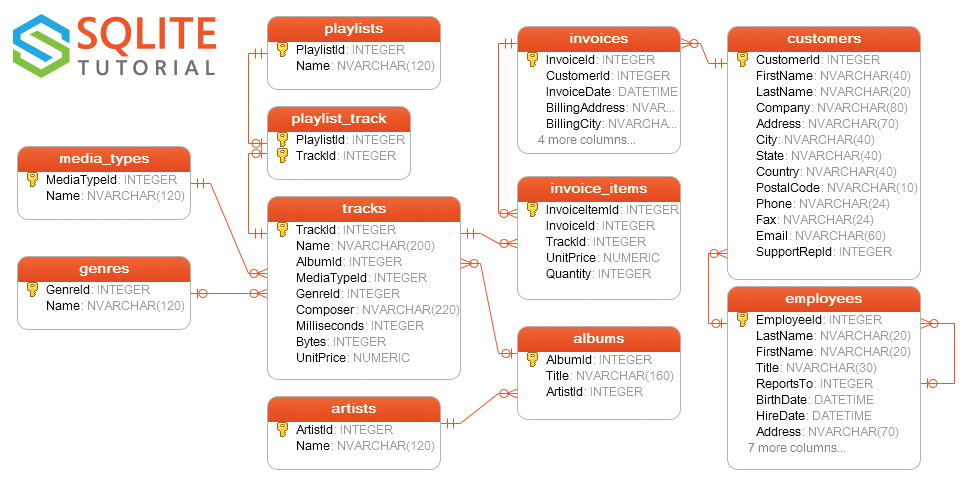
  
The following code will use Structured Query Language (SQL) which can be used with most databases.  For more information on SQL, refer to https://www.w3schools.com/sql/default.asp  

## 5.1 Connecting to a database

In [ ]:
# Import the sqlite3 module
import sqlite3

# Connect to the chinook database and create a handle
db = sqlite3.connect('chinook.db')

# Create a cursor (used to read from the database)
cursor = db.cursor()

## 5.2 Describing tables



In [ ]:
# Obtain information about the 'albums' table
query = 'SELECT * FROM albums'
cursor.execute(query)
cursor.description

# To print just the field names, use the following
#for f in cursor.description:
#    print(f[0])

In [ ]:
# Obtain information about the 'artists' table
query = 'SELECT * FROM artists'
cursor.execute(query)
cursor.description

# To print just the field names, use the following
#for f in cursor.description:
#    print(f[0])

In [ ]:
# Count rows in the ‘albums’ table:
query = 'SELECT COUNT(*) FROM albums'
cursor.execute(query)
count = cursor.fetchone()
print(count)

# Or get the count value directly
print(count[0])

## 5.3 Selecting data from a table using 'SELECT'

In [ ]:
# Point to the contents of the ‘albums’ table:
query = 'SELECT * FROM albums'
cursor.execute(query)

In [ ]:
# Retrieve the first row:
album1 = cursor.fetchone()
print(album1)

In [ ]:
# Retrieve all rows:
all_albums = cursor.fetchall()
for album in all_albums:
    print(album)


## 5.4 Joining tables using 'JOIN' and 'ON'
Most databases have more than one table, so data often needs to be "joined" together from two or more tables to provide the data required for analysis.  This is done by matching "key" fields in the two tables that have been designed to create a "relationship" between the two tables.  For more information about joins, refer to the article on SQL referenced in the introduction.

In [ ]:
# Join two tables and retrieve specified columns:
query = """
        SELECT AlbumId, Title, Name FROM albums 
        JOIN artists ON albums.ArtistId = artists.ArtistId
        """
cursor.execute(query)
all_rows = cursor.fetchall()

for row in all_rows:
    print(row)

## 5.5 Selecting a subset of the table using 'WHERE'

In [ ]:
# Select rows from join based on a given condition:
query = """
        SELECT AlbumId, Title, Name FROM albums 
        JOIN artists ON albums.ArtistId = artists.ArtistId
        WHERE Name = 'Miles Davis'
        """
cursor.execute(query)
all_rows = cursor.fetchall()

for row in all_rows:
    print(row)

In [ ]:
# Format output:
col_names = ['AlbumId', 'Album', 'Artist']
print('{0:<10}{1:<40}{2}'.format(col_names[0], col_names[1], col_names[2]))

for row in all_rows:
    print('{0:<10}{1:<40}{2}'.format(row[0], row[1], row[2]))

## 5.6 Reading a table into a DataFrame

In [ ]:
# Read a table into a pandas DataFrame:
import pandas as pd

query = 'SELECT * FROM albums'
albums_df = pd.read_sql(query, db)
albums_df.head(10)

In [ ]:
# Join three tables and read selected output into a pandas DataFrame:
query = """
        SELECT tracks.Name, albums.Title, artists.Name FROM tracks
        JOIN albums ON tracks.AlbumId = albums.AlbumId
        JOIN artists ON albums.ArtistId = artists.ArtistId
        WHERE artists.Name = "Miles Davis"
        """

miles_davis_tracks_df = pd.read_sql(query, db)
miles_davis_tracks_df.head()


## 5.7 Closing the database
It is a good idea to close the database when you are finished accessing it.

In [ ]:
# Disconnect from the database
db.close()

### Exercise 5.1
Retrieve all rows from the ‘artists’ table.

In [ ]:
# Your code here


### Exercise 5.2
Find all the tracks in the chinook database that have the genre ‘Latin’.

In [ ]:
# Your code here
